In [1]:
#Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import matplotlib.ticker as ticker

In [2]:
# API Key from EIA
api_key = '4Cgy5BurMNMAhbo0RBIu3s5FFyyo37QEVmW0uBoz'
# PADD Names to Label Columns
# Change to whatever column labels you want to use.
SERIES_NAMES = ['OECD INVENTORY','GLOBAL CONSUMPTION','Brent']
# Enter all your Series IDs here separated by commas
SERIES_KEY = ['STEO.PASC_OECD_T3.M','STEO.PATC_WORLD.M','PET.RBRTE.M']
# Initialize list - this is the final list that you will store all the data from the json pull. Then you will use this list to concat into a pandas dataframe. 
final_data = []
# Choose start and end dates
startDate = '2004-01-01'
endDate = '2022-02-01'


# Pull in data via EIA API
for i in range(len(SERIES_KEY)):
    url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + SERIES_KEY[i]
    r = requests.get(url)
    json_data = r.json()
    
    if r.status_code == 200:
        print('Success!')
    else:
        print('Error')
    
    df = pd.DataFrame(json_data.get('series')[0].get('data'),
                      columns = ['Date', SERIES_NAMES[i]])
    df.set_index('Date', drop=True, inplace=True)
    final_data.append(df)

print(final_data)
    

Success!
Success!
Success!
[        OECD INVENTORY
Date                  
202312     2902.621332
202311     2922.538600
202310     2917.699467
202309     2906.616850
202308     2899.202308
...                ...
200305     2541.263000
200304     2493.210998
200303     2463.397002
200302     2394.414000
200301     2476.715001

[252 rows x 1 columns],         GLOBAL CONSUMPTION
Date                      
202312          103.378514
202311          102.282413
202310          101.451681
202309          102.698719
202308          102.511306
...                    ...
199005           65.387787
199004           65.372793
199003           67.275485
199002           68.156450
199001           67.461571

[408 rows x 1 columns],         Brent
Date         
202201  86.51
202112  74.17
202111  81.05
202110  83.54
202109  74.49
...       ...
198709  18.31
198708  18.98
198707  19.86
198706  18.86
198705  18.58

[417 rows x 1 columns]]


In [3]:
final_data[0]['Year']=final_data[0].index.astype(str).str[:4]
final_data[0]['Month']=final_data[0].index.astype(str).str[4:]
final_data[0]['Day']='1'
final_data[0]['Date'] = pd.to_datetime(final_data[0][['Year','Month','Day']])
final_data[0].set_index('Date',drop=True,inplace=True)
final_data[0].sort_index(inplace=True)
final_data[0] = final_data[0][startDate:endDate]
final_data[0] = final_data[0].iloc[:,:5]


final_data[1]['Year']=final_data[1].index.astype(str).str[:4]
final_data[1]['Month']=final_data[1].index.astype(str).str[4:]
final_data[1]['Day']='1'
final_data[1]['Date'] = pd.to_datetime(final_data[1][['Year','Month','Day']])
final_data[1].set_index('Date',drop=True,inplace=True)
final_data[1].sort_index(inplace=True)
final_data[1] = final_data[1][startDate:endDate]
final_data[1] = final_data[1].iloc[:,:5]


final_data[2]['Year']=final_data[2].index.astype(str).str[:4]
final_data[2]['Month']=final_data[2].index.astype(str).str[4:]
final_data[2]['Day']='1'
final_data[2]['Date'] = pd.to_datetime(final_data[2][['Year','Month','Day']])
final_data[2].set_index('Date',drop=True,inplace=True)
final_data[2].sort_index(inplace=True)
final_data[2] = final_data[2][startDate:endDate]
final_data[2] = final_data[2].iloc[:,:5]

final_data.append(final_data[1].copy())

final_data[3].rename(columns={"GLOBAL CONSUMPTION":"DAYS REMAINING"},inplace=True)
final_data[3]['DAYS REMAINING']=final_data[0]['OECD INVENTORY']/final_data[1]['GLOBAL CONSUMPTION']


## Import inflation data
final_data.append(pd.read_csv('/Users/peter/projects/oil/data/CPIAUCSL.csv'))



In [4]:

final_data[4]['Year']=final_data[4]['DATE'].str[:4]
final_data[4]['Month']=final_data[4]['DATE'].str[5:7]
final_data[4]['Day']=final_data[4]['DATE'].str[8:]
final_data[4]['Date'] = pd.to_datetime(final_data[4][['Year','Month','Day']])
final_data[4].set_index('Date',drop=True,inplace=True)
final_data[4].sort_index(inplace=True)
final_data[4] = final_data[4][startDate:endDate]
final_data[4] = final_data[4].iloc[:,:5]
final_data[4].drop(columns=['DATE'],inplace=True)
final_data[4]['CPIAUCSL']=final_data[4]['CPIAUCSL']/final_data[4]['CPIAUCSL'][-1]



In [5]:


""" 
final_data[2].loc[date(2022,1,1)]=[78.,2022,1,1]
final_data[2].loc[date(2022,2,1)]=[90.6,str(2022),str(2),str(1)] """

final_data.append(final_data[2].copy())



In [6]:

print(final_data[5])


            Brent  Year Month Day
Date                             
2004-01-01  31.28  2004    01   1
2004-02-01  30.86  2004    02   1
2004-03-01  33.63  2004    03   1
2004-04-01  33.59  2004    04   1
2004-05-01  37.57  2004    05   1
...           ...   ...   ...  ..
2021-09-01  74.49  2021    09   1
2021-10-01  83.54  2021    10   1
2021-11-01  81.05  2021    11   1
2021-12-01  74.17  2021    12   1
2022-01-01  86.51  2022    01   1

[217 rows x 4 columns]


In [7]:

final_data[5].rename(columns={"Brent":"Inflation Brent"},inplace=True)
final_data[5]['Inflation Brent']=final_data[2]['Brent']/final_data[4]['CPIAUCSL']



In [8]:

""" ##
final_data[0].to_csv('OECD_Inventory.csv')
final_data[1].to_csv('Global_Consumption.csv')
final_data[2].to_csv('Brent.csv')
final_data[3].to_csv('Days_Remaining_OECDinv_Globalcons.csv')
final_data[4].to_csv('cpi_usa.csv')
final_data[5].to_csv('Inflationary_Brent.csv') """



final_data[0]=final_data[3].copy()
final_data[1]=final_data[5].copy()

del final_data[5]
del final_data[4]
del final_data[3]
del final_data[2]

crude = pd.concat(final_data,axis=1) 

fd0=pd.DataFrame(final_data[0])
fd1=pd.DataFrame(final_data[1])

/var/folders/cn/9b7qzyxn6512frdxy000fj8h0000gn/T/ipykernel_2792/3397520230.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_yticklabels(range(24,44,2),fontsize=18)


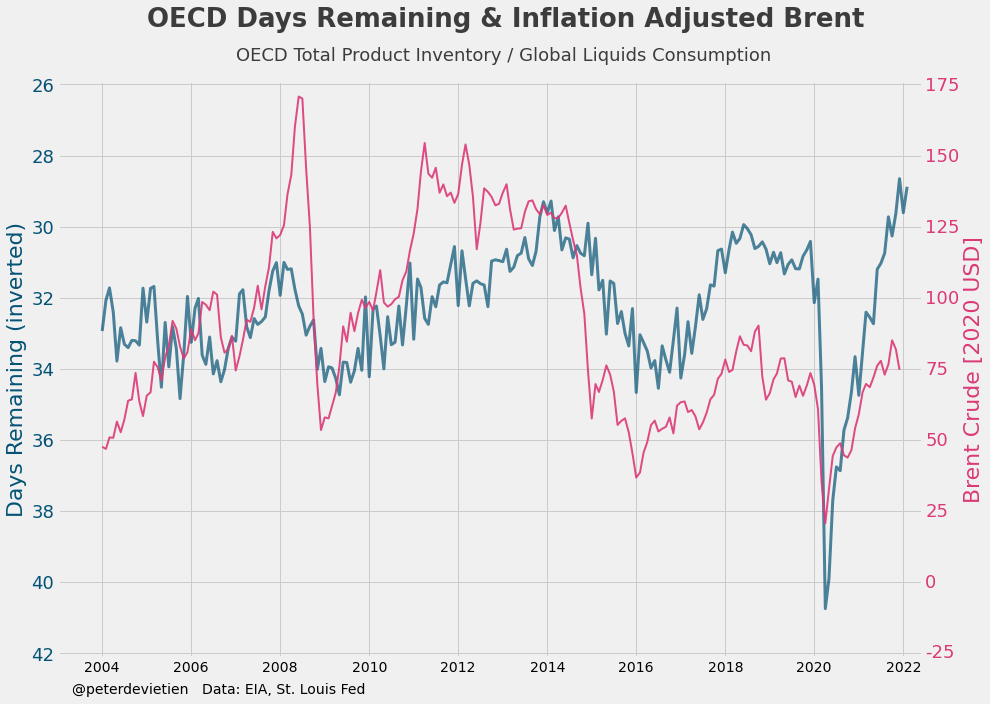

In [13]:

# Generating Colours and Style
colors = {'GLOBAL CONSUMPTION':'#045275','TREND 1':'#DC3977','TREND 2':'#DC3977'}
plt.style.use('fivethirtyeight')

fig=plt.figure(figsize=(12,8))

a1=fig.add_axes([0,0,1,1])

a1.plot(final_data[0].index,final_data[0]['DAYS REMAINING'],color='#045275',linewidth=3,alpha=0.7)
a1.invert_yaxis()
a2=a1.twinx()

a2.plot(final_data[1].index,final_data[1]['Inflation Brent'],color='#DC3977',linewidth=2,alpha=0.9)
#fig.tight_layout(pad=2)



xdates=[date(2000,1,1),date(2000,1,1) +relativedelta(years=2),date(2000,1,1) +relativedelta(years=4),date(2000,1,1) +relativedelta(years=6),\
date(2000,1,1) +relativedelta(years=8),date(2000,1,1) +relativedelta(years=10),date(2000,1,1) +relativedelta(years=12),date(2000,1,1) +relativedelta(years=14),\
    date(2000,1,1) +relativedelta(years=16),date(2000,1,1) +relativedelta(years=18),date(2000,1,1) +relativedelta(years=20),date(2000,1,1) +relativedelta(years=22)]
xlabels=[]
for i in xdates:
    xlabels.append(i.strftime('%Y'))

a1.set_xticks(xdates)
a1.set_xticklabels(xlabels)

a2.set_xticks(xdates)
a2.set_xticklabels(xlabels)

a1.set_xlim([date(2003,1,1),date(2022,6,1)])
a2.set_xlim([date(2003,1,1),date(2022,6,1)])

a2.grid(False)




a2.text(x = date(2003,5,1), 
          y = -40,
          s = '@peterdevietien   Data: EIA, St. Louis Fed', 
          fontsize = 14)


#a1.set_yticks(range(42,24,-2))
#a1.set_yticklabels(range(42,24,-2))
a2.tick_params(axis="y",labelcolor='#DC3977')
a1.tick_params(axis="y",labelcolor='#045275')
a1.set_ylim([40.1,23.9])
a1.set_yticklabels(range(24,44,2),fontsize=18)
a1.set_ylabel('Days Remaining (inverted)',color='#045275',fontsize=22)
a1.set_xlabel('')

a2.set_yticks(range(-25,200,25))
a2.set_yticklabels(range(-25,200,25),fontsize=18)
a2.set_ylim([-27,176])
a2.set_ylabel('Brent Crude [2020 USD]',color='#DC3977',fontsize=22)


#a.legend({'Days Remaining* (LHS)'},loc=(.52,.80),fontsize=16)
#a2.legend({'Brent Crude** (RHS)'},loc=(.52,.86),fontsize=16)

a2.text(x = date(2005,1,1), 
          y = 195,
          s = 'OECD Days Remaining & Inflation Adjusted Brent', 
          fontsize = 26,
          weight='bold',
          alpha=0.75)

a2.text(x = date(2007,1,1), 
          y = 183,
          s = 'OECD Total Product Inventory / Global Liquids Consumption', 
          fontsize = 18,
          alpha=0.75)

pngname='days_remaining_oecd_global_brent_inverted'
plt.savefig('/Users/peter/projects/oil/post/'+pngname,bbox_inches="tight")


In [10]:
k=range(42,24,-2)
print(k[2])


38
